In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import time
from numpy.linalg import eigvals, norm
import pickle

from graph_utils import *

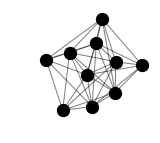

In [3]:
G = nx.gnp_random_graph(10,0.75)
p = draw_graph(G,fig_size=2)

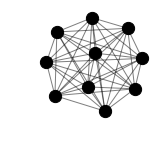

In [4]:
K = nx.complete_graph(len(G))
p=draw_graph(K,fig_size=2)

In [5]:
BK = nx.incidence_matrix(K, oriented=True).todense()
BK.shape

(10, 45)

In [6]:
np.kron(BK,np.eye(2)).shape

(20, 90)

In [7]:
np.eye(1)

array([[1.]])

(0, 5)

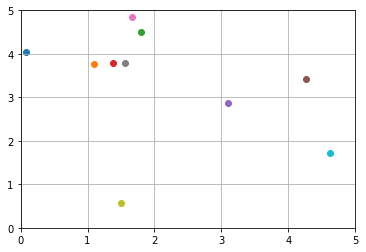

In [8]:
x_max = y_max = 5
positions = np.zeros((len(G)*2))
velocities = np.zeros((len(G)*2))
i=0
while(i<len(G)*2):
    positions[i],positions[i+1] = y_max*np.random.rand(2)
    i= i+2
    
i=0
while(i<len(G)*2):
    velocities[i],velocities[i+1] = 5*np.random.rand(2)
    i= i+2
    
i=0
while i < len(G)*2:
    plt.scatter(positions[i],positions[i+1])
    i = i+2
plt.grid()
plt.xlim(0,x_max)
plt.ylim(0,y_max)

In [9]:
positions = positions.reshape(1,20)
velocities = velocities.reshape(1,20)
positions.shape

(1, 20)

In [10]:
def S_graph_pos(positions,R=3):
    S = nx.Graph()
    if (positions.shape[1] != 2): 
        size = (int(positions.shape[1]/2),2)
    else:
        size = positions.shape
    for i,r1 in enumerate(positions.reshape(size)):
        for j,r2 in enumerate(positions.reshape(size)):
            if (sum(r1 == r2) < 2 and norm(r1-r2)<R):
                S.add_edge(i,j)
            else:
                S.add_node(i)
    return S

In [11]:
def S_graph_rel(re,n,R=3):
    S = nx.Graph()
    size = (int(re.shape[1]/2),2)
    for i in range(0,n):
        S.add_node(i)
    j=-1
    for i, x in enumerate(re.reshape(size)):
        if (i % 9 == 0):
            j=j+1
        if (norm(x)<R):
            print(j)
            S.add_edge(j,i%9)
            
    return S

In [12]:
R.reshape((45,2))

NameError: name 'R' is not defined

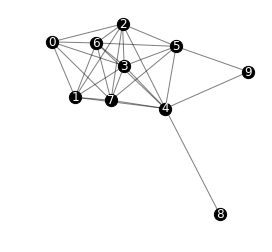

In [13]:
S = S_graph_pos(positions,3)
            
p=draw_graph(S,fig_size=4, labels=True)

In [14]:
re = np.dot(positions,np.kron(BK,np.eye(2)))

0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4


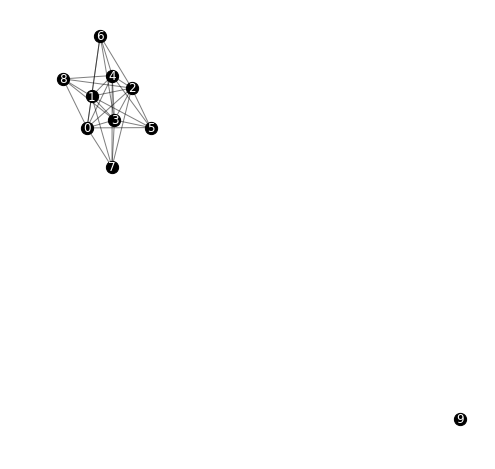

10

In [15]:
p=re.reshape((45,2))
s = S_graph_rel(re,10,100)
q = draw_graph(s,labels=True)
len(s)

In [16]:
p

matrix([[ 1.01986127, -0.27792384],
        [ 1.72047693,  0.47463886],
        [ 1.29924625, -0.23888261],
        [ 3.01923163, -1.1633114 ],
        [ 4.19452341, -0.60654337],
        [ 1.58944997,  0.81674738],
        [ 1.48034963, -0.24651682],
        [ 1.43054012, -3.4677369 ],
        [ 4.54462164, -2.31217547],
        [ 0.70061566,  0.7525627 ],
        [ 0.27938497,  0.03904124],
        [ 1.99937036, -0.88538756],
        [ 3.17466214, -0.32861953],
        [ 0.5695887 ,  1.09467122],
        [ 0.46048836,  0.03140702],
        [ 0.41067885, -3.18981306],
        [ 3.52476037, -2.03425162],
        [-0.42123069, -0.71352146],
        [ 1.2987547 , -1.63795026],
        [ 2.47404648, -1.08118223],
        [-0.13102696,  0.34210852],
        [-0.2401273 , -0.72115568],
        [-0.28993681, -3.94237576],
        [ 2.82414471, -2.78681432],
        [ 1.71998538, -0.9244288 ],
        [ 2.89527716, -0.36766076],
        [ 0.29020373,  1.05562998],
        [ 0.18110339, -0.007

In [17]:
norm(p[9])

1.0282085980845215

In [18]:
np.array([0.010596,1.9689])-np.array([])

ValueError: operands could not be broadcast together with shapes (2,) (0,) 

In [19]:
def stack(v):
    if v.shape != (len(v),2):
        print("Wrong shape need (any,2)")
        return -1
    ret = np.zeros(2*len(v))
    j=0
    for i in range(0,len(v)):
        ret[j] = v[i,0]
        ret[j+1] = v[i,1]
        j = j+2
    return ret

def unstack(v):
    ret = np.zeros((int((len(v)/2)),2))
    i=0
    j=0
    while i < len(v):
        ret[j,0] = v[i]
        ret[j,1] = v[i+1]
        i = i+2
        j = j+1
    return ret

def v_dot(v, r, v_graph, s_graph, R):
    def grad_V(r1,r2,R=3):
        r = norm(r1-r2)
        if (r < 0 ):
            return float('inf')
        if(r<R):
            return (r1-r2)*(-2**R**2)/(r**4)
        else:
            return (r1-r2)/(r*R)
    #v = v.reshape((len(v_graph),2))
    v_dot = np.zeros((len(v_graph),2))
    dv = 0
    for i in range(0,len(v_graph)):
        for j in nx.neighbors(v_graph,i):
            if (j != i):
                dv = dv + (v[i]-v[j])
        dV = 0
        for k in range(0,len(v_graph)):
            for l in nx.neighbors(s_graph,k):
                if (l != k):
                    dV = dV + grad_V(r[k],r[l],R=R)
        v_dot[i] = v_dot[i] - dv - dV
    return v_dot
    #return v_dot.reshape((1,2*len(v)))

def r_dot(v):
    return v

def V(r1,r2, R=3):
    r = norm(r1-r2)
    if (r < 0):
        return float('inf')
    if(r < R):
        return (R**2)/(r**2)
    else:
        return r/R

def grad_V(r1,r2,R=3):
    r = norm(r1-r2)
    if (r < 0 ):
        return float('inf')
    if(r<R):
        return (r1-r2)*(-2**R**2)/(r**4)
    else:
        return (r1-r2)/(r*R)

In [20]:
positions

array([[0.07450499, 4.03543948, 1.09436627, 3.75751564, 1.79498193,
        4.51007834, 1.37375124, 3.79655687, 3.09373662, 2.87212808,
        4.2690284 , 3.42889611, 1.66395497, 4.85218686, 1.55485463,
        3.78892266, 1.50504512, 0.56770258, 4.61912664, 1.72326402]])

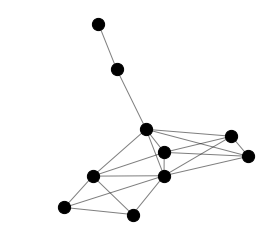

In [171]:
x_max = y_max = 10
positions = np.zeros((len(G)*2))
velocities = np.zeros((len(G)*2))
i=0
while(i<len(G)*2):
    positions[i],positions[i+1] = y_max*np.random.rand(2)
    i= i+2
    
i=0
while(i<len(G)*2):
    velocities[i],velocities[i+1] = 10*np.random.rand(2)
    i= i+2
    
d = 4
S = S_graph_pos(positions.reshape((10,2)),d)

G = nx.gnp_random_graph(10,0.75)

T = 10
dt=0.01
t=0

v_graph = G
s_graph = S
r = positions.reshape((10,2))
v = velocities.reshape((10,2))

p = draw_graph(S,fig_size=4)

In [172]:
R = list()
V = list()
SG = list()
VG = v_graph

while t < T:
    u = v
    v = v + dt*v_dot(v,r,v_graph, s_graph, R=d)
    r = r+dt*r_dot(u)
    s_graph = S_graph_pos(r, R=d)
    R.append(r)
    V.append(v)
    SG.append(s_graph)
    t = t+dt

In [173]:
len(V)*dt

10.01

In [46]:
def update_frame(V,R,SG,VG,i):
    fig = plt.figure(1)
    unit = np.zeros(V[i].shape)
    for j in range(0,len(V[i])):
        unit[j] = V[i][j]/norm(V[i][j])

    for j in range(0,10):
        plt.arrow(R[i][j,0],R[i][j,1],unit[j,0],unit[j,1],
                  width=.1,
                  edgecolor='green',
                  facecolor='green')


    nx.draw_networkx(SG[i], pos=R[i], edge_color='black', width=2.5, node_size=25, with_labels=False)
    nx.draw_networkx(VG, pos=R[i], edge_color='blue', width=0.5, node_size=25, with_labels=False)


    plt.xlim(plt.xlim()[0]-unit[0,0],plt.xlim()[1]+unit[0,0])
    plt.ylim(plt.ylim()[0]-unit[0,1], plt.ylim()[1]+unit[0,1])
    
    speed = np.zeros(V[i].shape[0])
    for j in range(0,V[i].shape[0]):
        speed[j] = norm(V[i][j])
    
    plt.title("Mean speed: {0} u/s \n Simulation Time {1} s".format(np.round(np.mean(speed),2), i*dt))

    return fig

In [47]:
for i in range(0,100):
    f = update_frame(V,R,SG,VG,i)
    f.savefig('sim_pic/'+str(i)+'.png')
    plt.cla()

NameError: name 'R' is not defined

In [42]:
imageio.mimwrite

AttributeError: 'function' object has no attribute 'help'

In [45]:
import imageio
import os
ids = list()
for i in range(0,100):
    ids.append('sim_pic/'+str(i)+'.png')

images = []
for i in ids:
    images.append(imageio.imread(i))
imageio.mimsave('Data/movie.gif', images, 'GIF', duration=0.05)

In [161]:
import matplotlib.animation as animation

fig = plt.figure()

ims = []
for i in range(0,100):
    if (i % 10 == 0):
        unit = np.zeros(V[i].shape)
        for j in range(0,len(V[i])):
            unit[j] = V[i][j]/norm(V[i][j])

        for j in range(0,10):
            plt.arrow(R[i][j,0],R[i][j,1],unit[j,0],unit[j,1],
                      width=.1,
                      edgecolor='green',
                      facecolor='green')


        nx.draw_networkx(SG[i], pos=R[i], edge_color='r', width=5)
        nx.draw_networkx(VG, pos=R[i], edge_color='black', width=2.5)


        plt.xlim(plt.xlim()[0]-unit[0,0],plt.xlim()[1]+unit[0,0])
        plt.ylim(plt.ylim()[0]-unit[0,1], plt.ylim()[1]+unit[0,1])

        fig.canvas.draw()
        X = np.array(fig.canvas.renderer._renderer)
        im = plt.imshow(X)
        ims.append([im])
        plt.cla()


ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)


from matplotlib.animation import FFMpegWriter
writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save("movie.mp4", writer=writer)

<Figure size 432x288 with 0 Axes>

In [76]:
image.reshape((width,height,3))

TypeError: 'numpy.float64' object cannot be interpreted as an integer

IndexError: index 10 is out of bounds for axis 0 with size 10

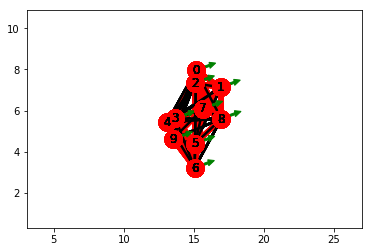

In [176]:
unit = np.zeros(v.shape)
for i in range(0,len(v)):
    unit[i] = v[i]/norm(v[i])


for i in range(0,10):
    plt.arrow(r[i,0],r[i,1],unit[i,0],unit[i,1],
              width=.1,
              edgecolor='green',
              facecolor='green')
    

    nx.draw_networkx(s_graph, pos=r, edge_color='r', width=5)
    nx.draw_networkx(v_graph, pos=r, edge_color='black', width=2.5)

    plt.xlim(plt.xlim()[0]-unit[0,0],plt.xlim()[1]+unit[0,0])
    plt.ylim(plt.ylim()[0]-unit[0,1], plt.ylim()[1]+unit[0,1])

In [773]:
r+unit

array([[11.6178834 , 16.82326793],
       [ 8.21081087, 20.97450117],
       [11.03134134, 18.07299392],
       [10.47557443, 19.50011206],
       [ 8.07940133, 17.86088501],
       [ 8.469207  , 18.87242446],
       [ 8.97656978, 16.57675374],
       [11.61233867, 19.19752416],
       [ 8.61166422, 16.53934395],
       [ 7.35830903, 20.54549009]])

In [735]:
positions.reshape(10,2)

array([[4.1713068 , 0.91813427],
       [0.97396728, 4.85186166],
       [3.72728247, 1.90933124],
       [3.15961453, 3.42721454],
       [0.76077245, 1.77322941],
       [1.18878545, 2.57583381],
       [1.4727141 , 0.64003011],
       [4.44526626, 3.06014689],
       [1.25423651, 0.49133175],
       [0.0385735 , 4.4077663 ]])

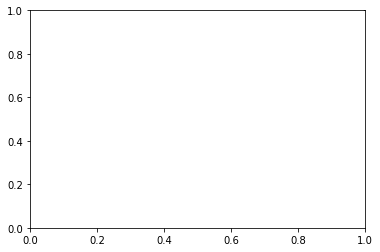

In [802]:
plt.arrow(1,1,2,2, width=.15,edgecolor=None, facecolor='black')

In [276]:
velocities

array([[0.9959915 , 0.78822563, 1.15127203, 1.12897428, 1.27558316,
        0.24665442, 0.86674908, 1.57417972, 0.54896427, 0.12964408,
        0.82305116, 1.42658465, 1.16794972, 1.51903638, 0.66539465,
        0.42100074, 1.40954961, 0.6916389 , 0.25997836, 1.17899304]])

In [277]:
unstack(v)

0


IndexError: index 0 is out of bounds for axis 0 with size 0

In [282]:
v

array([[0.9959915 , 0.78822563, 1.15127203, 1.12897428, 1.27558316,
        0.24665442, 0.86674908, 1.57417972, 0.54896427, 0.12964408,
        0.82305116, 1.42658465, 1.16794972, 1.51903638, 0.66539465,
        0.42100074, 1.40954961, 0.6916389 , 0.25997836, 1.17899304]])

In [295]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

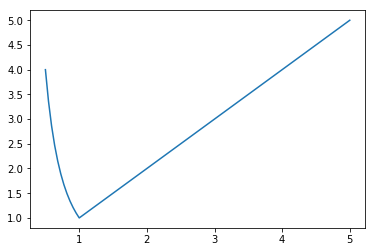

In [331]:
x = np.linspace(0.5,5,100)
y = np.zeros(len(x))
for i in range(0,len(x)):
    y[i] = V(x[i],0)
plt.plot(x,y)

In [326]:
norm(1-0)

1.0

In [838]:
unit[2], unit[1]

(array([0.41307351, 0.91069769]), array([0.41307351, 0.91069769]))

In [843]:
ref = np.angle(complex(unit[1,0],unit[1,1]))
f = True
tol=1e-6
for i in range(0,len(unit)):
    if (np.abs(ref - np.angle(complex(unit[i,0],unit[i,1])))>tol):
        f = False
print(f)
    

True


In [1]:
def velocity_angle_agreement(v,tol=1e-6):
    unit = np.zeros(v.shape)
    for i in range(0,len(v)):
        unit[i] = v[i]/norm(v[i])
    ref = np.angle(complex(unit[1,0],unit[1,1]))
    for i in range(0,len(unit)):
        if (np.abs(ref - np.angle(complex(unit[i,0],unit[i,1])))>tol):
            return False
    return True

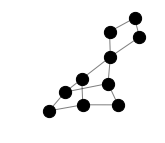

In [2]:
import os
os.chdir("../")
from Flocking_2D import *

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import time
from numpy.linalg import eigvals, norm
import pickle

from graph_utils import *

G = nx.gnp_random_graph(10,0.3)
p = draw_graph(G,fig_size=2)

def v_dot(v, r, v_graph, s_graph,R, *args):
    def grad_V(r1,r2,R=3):
        r = norm(r1-r2)
        if (r < 0 ):
            return float('inf')
        if(r<R):
            return (r1-r2)*(-2**R**2)/(r**4)
        else:
            return (r1-r2)/(r*R)
    #v = v.reshape((len(v_graph),2))
    v_dot = np.zeros((len(v_graph),2))
    dv = 0
    for i in range(0,len(v_graph)):
        for j in nx.neighbors(v_graph,i):
            if (j != i):
                dv = dv + (v[i]-v[j])
        dV = 0
        for k in range(0,len(v_graph)):
            for l in nx.neighbors(s_graph,k):
                if (l != k):
                    dV = dV + grad_V(r[k],r[l],R)
        v_dot[i] = v_dot[i] - dv - dV
    return v_dot
    #return v_dot.reshape((1,2*len(v)))

def r_dot(v, *args):
    return v

In [3]:
FS = Flock_Simulation(G,r_dot,v_dot)

Argument Error: position_dynamics_args must be np.ndarray type
Argument Error: velocity_dynamics_args must be np.ndarray type


In [4]:
FS.v

array([[  2.11143843,   1.78008129],
       [  1.98595931,   4.87102148],
       [  5.56839035,  -7.92060588],
       [ -1.98146742,  -1.35982799],
       [  4.44118291,  -1.50070038],
       [ -2.57456137,  -8.65491936],
       [-10.34638493,   3.22463896],
       [  7.62633612,  -2.44532269],
       [  8.04736204,   0.24960999],
       [  9.02459951,   3.16511461]])

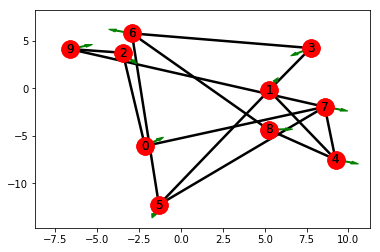

In [5]:
FS.plot()

In [15]:
FS.r

array([[ 90.58441325,  26.21906518],
       [101.24071775,  33.28443896],
       [ 94.69737924,  30.42093715],
       [100.53878775,  39.6857645 ],
       [108.25583701,  25.52827229],
       [ 93.11231275,  18.69247487],
       [ 91.72221014,  42.22663469],
       [108.7445257 ,  29.50823013],
       [101.37852097,  29.51359194],
       [ 90.72778371,  38.27927196]])

In [6]:
FS.run_sim_switch()

1.3919548988342285


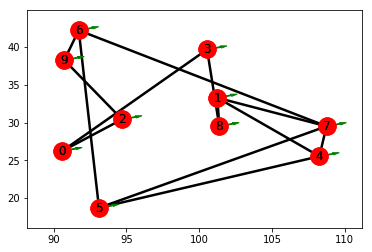

In [7]:
FS.plot()

In [9]:
r = np.zeros((5,2))
for i in range(0,5):
    r[i] = 5*np.random.rand(2)

In [10]:
r

array([[1.77816332, 2.52887365],
       [3.78330912, 2.66989089],
       [2.02796301, 0.44861403],
       [3.09643337, 2.23638297],
       [3.1714566 , 0.67898493]])

In [16]:
5*np.random.randn(2)

array([ 4.6266365 , -1.11736781])